In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

# Example Pulling Micrsoft Stock

In [65]:
msft = yf.Ticker("MSFT")

In [66]:
hist = msft.history(period="max") 

<AxesSubplot:title={'center':'MFFT Stock Price'}, xlabel='Date'>

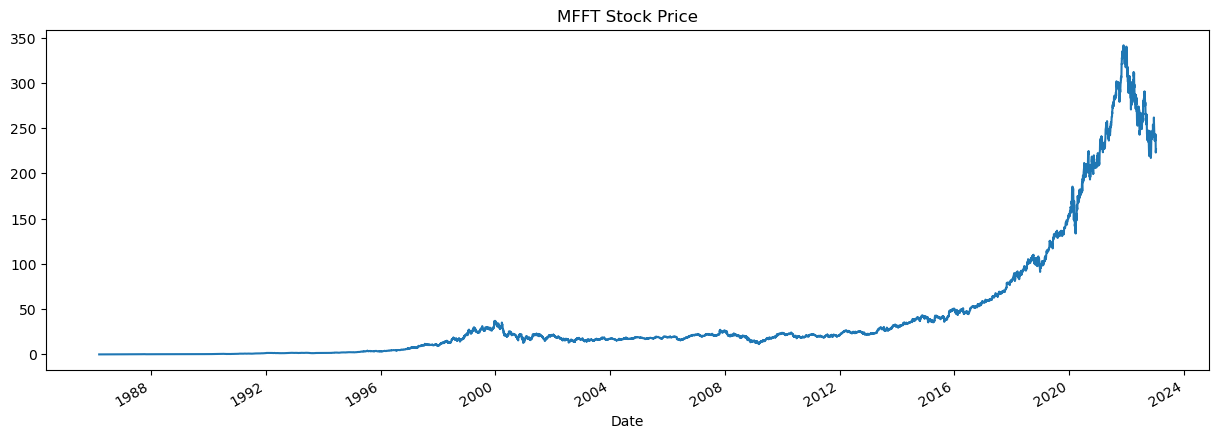

In [67]:
hist['Open'].plot(figsize=(15,5),title="MFFT Stock Price")

In [68]:
msft.calendar

,0,1
Earnings Date,2023-01-23 10:59:00,2023-01-27 12:00:00
Earnings Average,2.3,2.3
Earnings Low,2.23,2.23
Earnings High,2.36,2.36
Revenue Average,52991600000,52991600000
Revenue Low,52389000000,52389000000
Revenue High,53871800000,53871800000


## Pull a bunch of Stocks
- 3 years of history

- 

In [69]:
stonks = [
    "^GSPC",
    "ETSY",
    "PINS",
    "SQ",
    "SHOP",
    "O",
    "MELI",
    "ISRG",
    "DIS",
    "BRK-B",
    "AMZN",
    "ZM",
    "PFE",
    "CLX",
    "DPZ",
    "RTX",
]

In [70]:
hists = {}
for s in stonks:
    tkr = yf.Ticker(s)
    history = tkr.history(period="3y")
    hists[s] = history

## Plot the Stock Price

In [71]:
for stock in stonks:
    temp_df = hists[stock].copy()

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=temp_df.index,
                open=temp_df["Open"],
                high=temp_df["High"],
                low=temp_df["Low"],
                close=temp_df["Close"],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=300,
        paper_bgcolor="LightSteelBlue",
        title=stock,
    )

    fig.show()

# Pull Tweets about each Stock


In [75]:
stock = "CLX"

In [80]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas
from tqdm.notebook import tqdm

# Creating list to append tweet data
tweets_list = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"${stock} since:2020-01-10 until:2023-01-10"
        ).get_items()
    ),
    total=12_000,
):  # declare a username
    if i > 12_000:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.content, tweet.user.username]
    )  # declare the attributes to be returned
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/12000 [00:00<?, ?it/s]

# Sentiment Analysis Prep

In [ ]:
tweet_df['Text']